In [43]:
import pandas as pd
import numpy as np

In [44]:
from google.colab import drive
drive.mount('/content/drive')
pd.set_option("display.max_columns",None)
data=pd.read_csv("/content/drive/MyDrive/ML_tutorial/immo_data.csv")
data.info()
new_data=data.copy() # کپی برای قسمت اسپارک

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           2

In [45]:
data.isna().sum()/len(data)
non_data=data.columns[(data.isna().sum()/len(data))>0.5]# است  nan  مشخص کردن ستون هایی که بیش از 50 درصد انها 
print()
data.drop(non_data,inplace=True,axis=1)# است  nan  حذف ستون هایی که بیش از 50 درصد انها 
data

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.40,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.00,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.90,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,0,2.74,10.0,910.0,2016.0,115641081,geothermal,False,Bayern,True,9.0,820.0,NaN,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,no_information,NaN,False,6,roof_storey,82390,3.0,NaN,NaN,NaN,3,False,4,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,NaN,False,True,12,6.49,NaN,1150.0,1983.0,96981497,gas,True,Hessen,False,4.0,930.0,NaN,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,no_information,NaN,False,6,apartment,68519,3.5,NaN,1.0,1.0,3,False,5,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,False,True,21,2.90,40.0,930.0,1965.0,66924271,gas,False,Hessen,True,2.0,650.0,10,95.00,Limburg_Weilburg_Kreis,well_kept,NaN,negotiable,Emsbachstrasse,Emsbachstrasse,False,5,apartment,65552,4.0,160.77,1.0,2.0,4,True,4,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,True,True,16,4.39,NaN,1015.0,2019.0,110938302,gas,False,Nordrhein_Westfalen,True,9.0,840.0,58,70.00,Köln,first_time_use,sophisticated,no,Idastra&szlig;e,Idastraße,True,6,apartment,51069,2.0,2

In [46]:
data.isna().sum()

regio1                       0
serviceCharge             6909
heatingType              44856
telekomTvOffer           32619
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                1832
telekomUploadSpeed       33358
totalRent                40517
yearConstructed          57045
scoutId                      0
firingTypes              56964
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange     57045
baseRent                     0
houseNumber              71018
livingSpace                  0
geo_krs                      0
condition                68489
interiorQual            112665
petsAllowed             114573
street                       0
streetPlain              71013
lift                         0
baseRentRange                0
typeOfFlat               36614
geo_plz                      0
noRooms                      0
thermalChar             106506
floor   

In [47]:
# data._get_numeric_data().mean() # پرکردن داده های عددی غیر موحود با ستون خودش 
data.fillna(data._get_numeric_data().mean(),inplace=True)
data.isna().sum()

regio1                       0
serviceCharge                0
heatingType              44856
telekomTvOffer           32619
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
scoutId                      0
firingTypes              56964
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange         0
baseRent                     0
houseNumber              71018
livingSpace                  0
geo_krs                      0
condition                68489
interiorQual            112665
petsAllowed             114573
street                       0
streetPlain              71013
lift                         0
baseRentRange                0
typeOfFlat               36614
geo_plz                      0
noRooms                      0
thermalChar                  0
floor   

In [48]:
for col in data.columns: # تشخیث و حذه داده های پرت 
  if data[col].dtype=="int64" or data[col].dtype=="float64":
    print(col)
    upper_range=data[col].mean()+ 3*data[col].std()
    lower_range=data[col].mean()- 3*data[col].std()

    indexs=data[(data[col]>upper_range) | (data[col]<lower_range) ].index

    data=data.drop(indexs)


serviceCharge
picturecount
pricetrend
telekomUploadSpeed
totalRent
yearConstructed
scoutId
yearConstructedRange
baseRent
livingSpace
baseRentRange
geo_plz
noRooms
thermalChar
floor
numberOfFloors
noRoomsRange
livingSpaceRange


In [49]:
for col in data.columns:
  if data[col].dtype=="object" or data[col].dtype=="bool":
    
    data[col].fillna(data[col].value_counts().head(1).index[0],inplace=True) # پر کردن ستون های غیر عددی ناموجود با بیشترین فراوانی از همان ستون

In [50]:
for col in data.columns:# مشخص کردن دیتاهای یکتای هر ستون
  # if data[col].dtype=="object" or data[col].dtype=="bool":
    
    print(col)
    print(len(data[col].unique()))

regio1
16
serviceCharge
11620
heatingType
13
telekomTvOffer
3
newlyConst
2
balcony
2
picturecount
30
pricetrend
1094
telekomUploadSpeed
7
totalRent
26878
yearConstructed
185
scoutId
250467
firingTypes
128
hasKitchen
2
geo_bln
16
cellar
2
yearConstructedRange
10
baseRent
25251
houseNumber
5266
livingSpace
12662
geo_krs
419
condition
10
interiorQual
4
petsAllowed
3
street
49145
streetPlain
50939
lift
2
baseRentRange
9
typeOfFlat
10
geo_plz
7481
noRooms
33
thermalChar
6770
floor
14
numberOfFloors
20
noRoomsRange
5
garden
2
livingSpaceRange
7
regio2
419
regio3
8508
description
197343
facilities
174764
date
4


In [51]:


#dropping columns that dont contribute to prediction of Price
data.drop(["scoutId","yearConstructedRange","houseNumber","street","picturecount","streetPlain","regio2","regio3"], inplace=True,axis=1)# حذف ستون های که غیر کاربردی به نظر میرسند

In [52]:
for col in data.columns:
  if data[col].dtype=="object" or data[col].dtype=="bool":
    
    print(col)
    print(len(data[col].unique()))

regio1
16
heatingType
13
telekomTvOffer
3
newlyConst
2
balcony
2
firingTypes
128
hasKitchen
2
geo_bln
16
cellar
2
geo_krs
419
condition
10
interiorQual
4
petsAllowed
3
lift
2
typeOfFlat
10
garden
2
description
197343
facilities
174764
date
4


In [53]:
data

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,firingTypes,hasKitchen,geo_bln,cellar,baseRent,livingSpace,geo_krs,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,description,facilities,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,4.62,10.000000,840.000000,1965.00000,oil,False,Nordrhein_Westfalen,True,595.0,86.00,Dortmund,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,3.47,10.000000,901.331522,1871.00000,gas,False,Rheinland_Pfalz,False,800.0,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4,Alles neu macht der Mai – so kann es auch für ...,Laminat,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.72,2.400000,1300.000000,2019.00000,gas,False,Sachsen,True,965.0,83.80,Dresden,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,1.53,40.000000,901.331522,1964.00000,district_heating,False,Sachsen,False,343.0,58.15,Mittelsachsen_Kreis,well_kept,normal,negotiable,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2,Abseits von Lärm und Abgasen in Ihre neue Wohn...,Laminat,May19
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,2.46,28.804928,903.000000,1950.00000,gas,False,Bremen,False,765.0,84.97,Bremen,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,2.58,2.400000,670.000000,1966.40059,gas,False,Nordrhein_Westfalen,False,590.0,85.00,Essen,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4,Bei dieser ansprechenden Immobilie handelt es ...,Laminat,Feb20
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,2.74,10.000000,910.000000,2016.00000,geothermal,False,Bayern,True,820.0,90.00,Weilheim_Schongau_Kreis,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,Feb20
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,6.49,28.804928,1150.000000,1983.00000,gas,True,Hessen,False,930.0,115.00,Bergstraße_Kreis,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",May19
268848,Nordrhein_Westfalen,175.00,heat_pump,ONE_YEAR_FREE,True,True,4.39,28.804928,1015.000000,2019.00000,gas,False,Nordrhein_Westfalen,True,840.0,70.00,Köln,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.700000,2.122405,5.000000,2,False,3,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",May19


In [54]:
data.drop(["facilities","description","geo_krs","firingTypes","geo_bln","date"],inplace=True,axis=1)# حذف ستون های که غیر کاربردی به نظر میرسند
data

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,4.62,10.000000,840.000000,1965.00000,False,True,595.0,86.00,well_kept,normal,negotiable,False,4,ground_floor,44269,4.0,181.400000,1.000000,3.000000,4,True,4
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,3.47,10.000000,901.331522,1871.00000,False,False,800.0,89.00,refurbished,normal,no,False,5,ground_floor,67459,3.0,114.749533,2.122405,3.572319,3,False,4
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,2.72,2.400000,1300.000000,2019.00000,False,True,965.0,83.80,first_time_use,sophisticated,negotiable,True,6,apartment,1097,3.0,114.749533,3.000000,4.000000,3,False,4
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,1.53,40.000000,901.331522,1964.00000,False,False,343.0,58.15,well_kept,normal,negotiable,False,2,other,9599,3.0,86.000000,3.000000,3.572319,3,False,2
4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,2.46,28.804928,903.000000,1950.00000,False,False,765.0,84.97,refurbished,normal,negotiable,False,5,apartment,28213,3.0,188.900000,1.000000,3.572319,3,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,Nordrhein_Westfalen,80.00,gas_heating,ONE_YEAR_FREE,False,False,2.58,2.400000,670.000000,1966.40059,False,False,590.0,85.00,first_time_use_after_refurbishment,sophisticated,negotiable,False,4,roof_storey,45279,3.0,114.749533,3.000000,3.000000,3,False,4
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,False,True,2.74,10.000000,910.000000,2016.00000,False,True,820.0,90.00,mint_condition,sophisticated,no,False,6,roof_storey,82390,3.0,114.749533,2.122405,3.572319,3,False,4
268846,Hessen,220.00,gas_heating,ONE_YEAR_FREE,False,True,6.49,28.804928,1150.000000,1983.00000,True,False,930.0,115.00,well_kept,sophisticated,negotiable,False,6,apartment,68519,3.5,114.749533,1.000000,1.000000,3,False,5
268848,Nordrhein_Westfalen,175.00,heat_pump,ONE_YEAR_FREE,True,True,4.39,28.804928,1015.000000,2019.00000,False,True,840.0,70.00,first_time_use,sophisticated,no,True,6,apartment,51069,2.0,24.700000,2.122405,5.000000,2,False,3


In [55]:
for col in data.columns:
  if data[col].dtype=="object" or data[col].dtype=="bool":
    
    print(col)
    print(len(data[col].unique()))

regio1
16
heatingType
13
telekomTvOffer
3
newlyConst
2
balcony
2
hasKitchen
2
cellar
2
condition
10
interiorQual
4
petsAllowed
3
lift
2
typeOfFlat
10
garden
2


In [56]:
data["regio1"].value_counts()

Nordrhein_Westfalen       58198
Sachsen                   55323
Bayern                    20302
Sachsen_Anhalt            19098
Hessen                    16589
Niedersachsen             15497
Baden_Württemberg         15111
Thüringen                  8027
Rheinland_Pfalz            7857
Berlin                     7803
Brandenburg                6460
Mecklenburg_Vorpommern     6324
Schleswig_Holstein         6187
Hamburg                    3520
Bremen                     2836
Saarland                   1335
Name: regio1, dtype: int64

In [57]:
data["heatingType"].value_counts()

central_heating                   161419
district_heating                   23573
gas_heating                        19006
self_contained_central_heating     16919
floor_heating                      16767
oil_heating                         4795
heat_pump                           2642
combined_heat_and_power_plant       1879
night_storage_heater                1256
wood_pellet_heating                  916
electric_heating                     839
stove_heating                        298
solar_heating                        158
Name: heatingType, dtype: int64

In [58]:
others=list(data["heatingType"].value_counts().tail(4).index)#که فراوانی کمی دارند  heatingType ادغام 4 مورد از ستون 
def edit_heatingType(x):
  if x in others:
    return "other"
  else:
    return x
data["heatingType_edit"]=data["heatingType"].apply(edit_heatingType)
data.drop("heatingType",inplace=True,axis=1)
data["heatingType_edit"].unique()

array(['central_heating', 'self_contained_central_heating',
       'floor_heating', 'district_heating', 'gas_heating', 'oil_heating',
       'other', 'combined_heat_and_power_plant', 'heat_pump',
       'night_storage_heater'], dtype=object)

In [59]:
data["condition"].value_counts()

well_kept                             126907
refurbished                            24750
fully_renovated                        24154
first_time_use                         21015
mint_condition                         19981
modernized                             15625
first_time_use_after_refurbishment     14641
negotiable                              2103
need_of_renovation                      1287
ripe_for_demolition                        4
Name: condition, dtype: int64

In [60]:
others=list(data["condition"].value_counts().tail(3).index)#که فراوانی کمی دارند  condition ادغام 3 مورد از ستون 
def edit_condition(x):
  if x in others:
    return "other"
  else:
    return x
data["condition_edit"]=data["condition"].apply(edit_condition)


In [61]:
data.drop("condition",inplace=True,axis=1)
data["condition_edit"].unique()

array(['well_kept', 'refurbished', 'first_time_use', 'fully_renovated',
       'mint_condition', 'first_time_use_after_refurbishment',
       'modernized', 'other'], dtype=object)

In [62]:
data["typeOfFlat"].value_counts()

apartment              156973
roof_storey             32145
ground_floor            29688
other                    8962
maisonette               8380
raised_ground_floor      5208
penthouse                3278
terraced_flat            3098
half_basement            1879
loft                      856
Name: typeOfFlat, dtype: int64

In [63]:
others=list(data["typeOfFlat"].value_counts().tail(2).index)#که فراوانی کمی دارند  typeOfFlat ادغام 2 مورد از ستون 
def edit_typeOfFlat(x):
  if x in others:
    return "other"
  else:
    return x
data["typeOfFlat_edit"]=data["typeOfFlat"].apply(edit_typeOfFlat)
data.drop("typeOfFlat",inplace=True,axis=1)
data["typeOfFlat_edit"].unique()


array(['ground_floor', 'apartment', 'other', 'roof_storey',
       'raised_ground_floor', 'terraced_flat', 'penthouse', 'maisonette'],
      dtype=object)

In [64]:
data.shape


(250467, 28)

In [65]:
data.drop_duplicates(inplace=True)# حذف داده های تکراری 

In [66]:
data.shape

(248260, 28)

In [67]:
categorical_columns=[]
for col in data.columns:
  if data[col].dtype=="object" or data[col].dtype=="bool":
    
      categorical_columns.append(col)
categorical_columns

['regio1',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'cellar',
 'interiorQual',
 'petsAllowed',
 'lift',
 'garden',
 'heatingType_edit',
 'condition_edit',
 'typeOfFlat_edit']

In [68]:
dummies_feature=pd.get_dummies(data[categorical_columns]) #روی ستون های غیر عددی باقی مانده one_hot_encoding  اجرای یک 
from sklearn.preprocessing import LabelEncoder
boo_col=["newlyConst","balcony","hasKitchen","cellar","lift","garden"]
for i in boo_col:
  dummies_feature[i]=LabelEncoder().fit_transform(dummies_feature[i])


dummies_feature

,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,heatingType_edit_central_heating,heatingType_edit_combined_heat_and_power_plant,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_heat_pump,heatingType_edit_night_storage_heater,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_first_time_use_after_refurbishment,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268845,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
268846,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
268848,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [69]:
data.drop(categorical_columns,axis=1,inplace=True)# categorical حذف ستون های 
data

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange
0,245.00,4.62,10.000000,840.000000,1965.00000,595.0,86.00,4,44269,4.0,181.400000,1.000000,3.000000,4,4
1,134.00,3.47,10.000000,901.331522,1871.00000,800.0,89.00,5,67459,3.0,114.749533,2.122405,3.572319,3,4
2,255.00,2.72,2.400000,1300.000000,2019.00000,965.0,83.80,6,1097,3.0,114.749533,3.000000,4.000000,3,4
3,58.15,1.53,40.000000,901.331522,1964.00000,343.0,58.15,2,9599,3.0,86.000000,3.000000,3.572319,3,2
4,138.00,2.46,28.804928,903.000000,1950.00000,765.0,84.97,5,28213,3.0,188.900000,1.000000,3.572319,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,80.00,2.58,2.400000,670.000000,1966.40059,590.0,85.00,4,45279,3.0,114.749533,3.000000,3.000000,3,4
268845,90.00,2.74,10.000000,910.000000,2016.00000,820.0,90.00,6,82390,3.0,114.749533,2.122405,3.572319,3,4
268846,220.00,6.49,28.804928,1150.000000,1983.00000,930.0,115.00,6,68519,3.5,114.749533,1.000000,1.000000,3,5
268848,175.00,4.39,28.804928,1015.000000,2019.00000,840.0,70.00,6,51069,2.0,24.700000,2.122405,5.000000,2,3


In [70]:
finally_data=pd.concat([data,dummies_feature],axis=1)#(دیتا فریم اصلی که ستون های غیر عددی حذف شدند و دیتا فریمی که انکدر روی ان اجرا شده   ) ادغام دو دیتا فریم 
finally_data

,serviceCharge,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,heatingType_edit_central_heating,heatingType_edit_combined_heat_and_power_plant,heatingType_edit_district_heating,heatingType_edit_floor_heating,heatingType_edit_gas_heating,heatingType_edit_heat_pump,heatingType_edit_night_storage_heater,heatingType_edit_oil_heating,heatingType_edit_other,heatingType_edit_self_contained_central_heating,condition_edit_first_time_use,condition_edit_first_time_use_after_refurbishment,condition_edit_fully_renovated,condition_edit_mint_condition,condition_edit_modernized,condition_edit_other,condition_edit_refurbished,condition_edit_well_kept,typeOfFlat_edit_apartment,typeOfFlat_edit_ground_floor,typeOfFlat_edit_maisonette,typeOfFlat_edit_other,typeOfFlat_edit_penthouse,typeOfFlat_edit_raised_ground_floor,typeOfFlat_edit_roof_storey,typeOfFlat_edit_terraced_flat
0,245.00,4.62,10.000000,840.000000,1965.00000,595.0,86.00,4,44269,4.0,181.400000,1.000000,3.000000,4,4,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,134.00,3.47,10.000000,901.331522,1871.00000,800.0,89.00,5,67459,3.0,114.749533,2.122405,3.572319,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,255.00,2.72,2.400000,1300.000000,2019.00000,965.0,83.80,6,1097,3.0,114.749533,3.000000,4.000000,3,4,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,58.15,1.53,40.000000,901.331522,1964.00000,343.0,58.15,2,9599,3.0,86.000000,3.000000,3.572319,3,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,138.00,2.46,28.804928,903.000000,1950.00000,765.0,84.97,5,28213,3.0,188.900000,1.000000,3.572319,3,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268844,80.00,2.58,2.400000,670.000000,1966.40059,590.0,85.00,4,45279,3.0,114.749533,3.000000,3.000000,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
268845,90.00,2.74,10.000000,910.000000,2016.00000,820.0,90.00,6,82390,3.0,114.749533,2.122405,3.572319,3,4,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
268846,220.00,6.49,28.804928,1150.000000,1983.00000,930.0,115.00,6,68519,3.5,114.749533,1.000000,1.000000,3,5,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
268848,175.00,4.39,28.804928,1015.000000,2019.00000,840.0,70.00,6,51069,2.0,24.700000,2.122405,5.000000,2,3,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


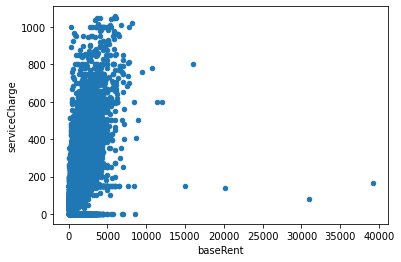

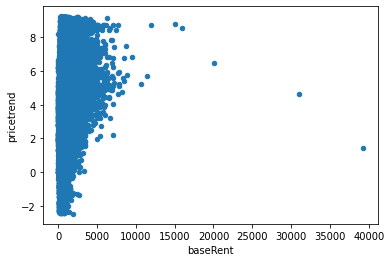

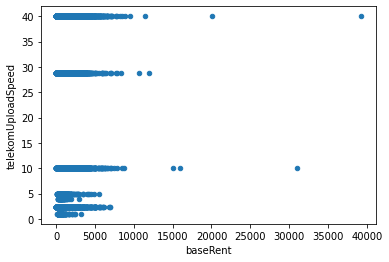

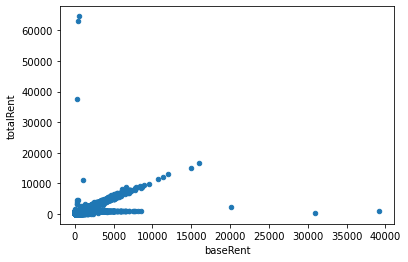

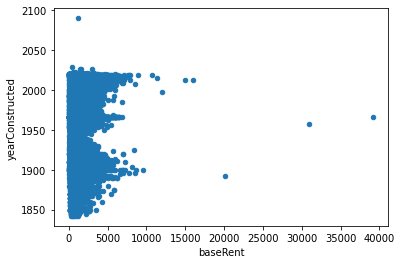

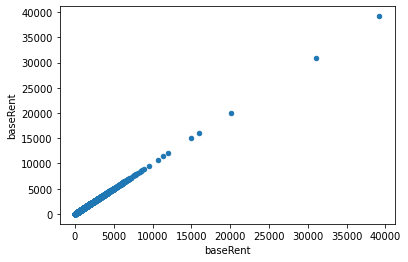

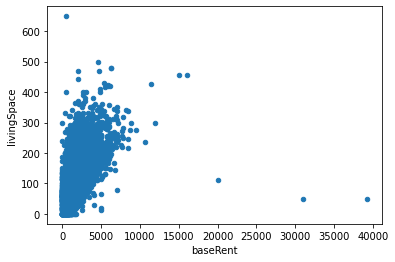

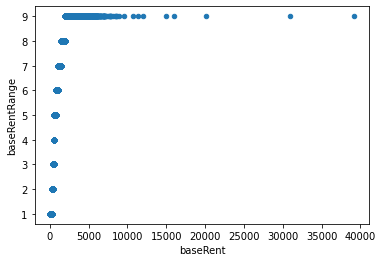

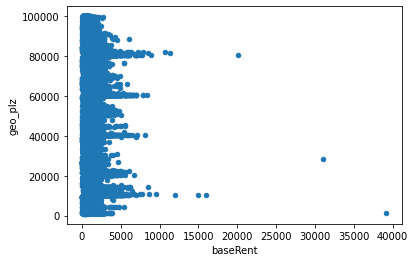

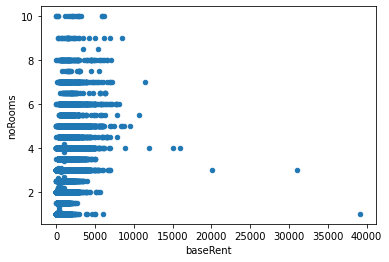

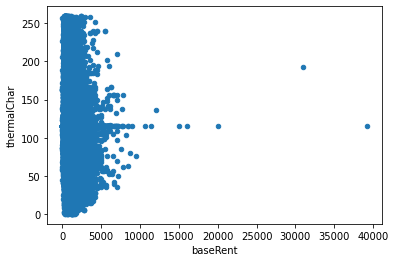

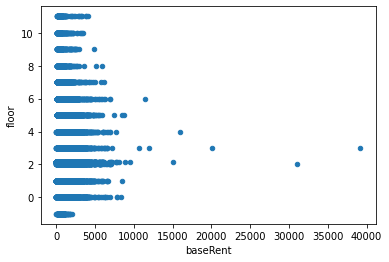

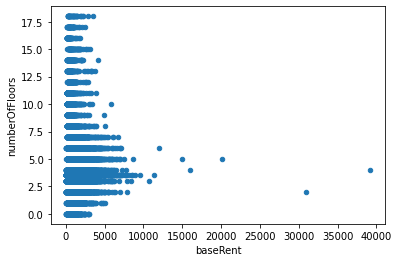

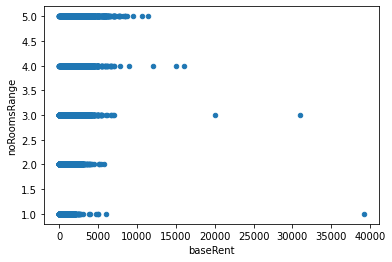

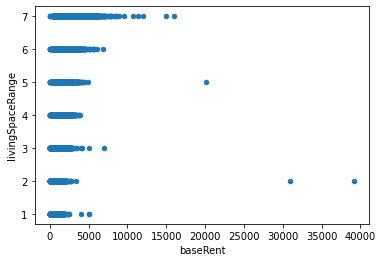

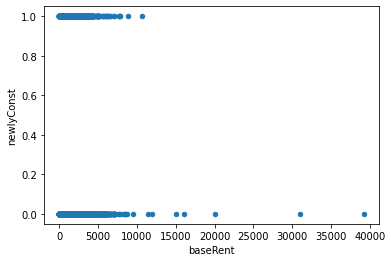

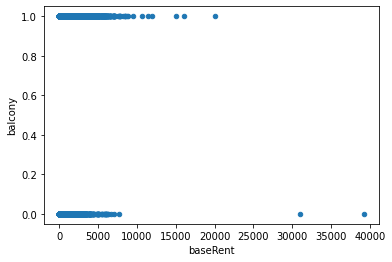

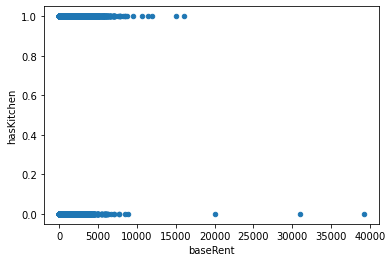

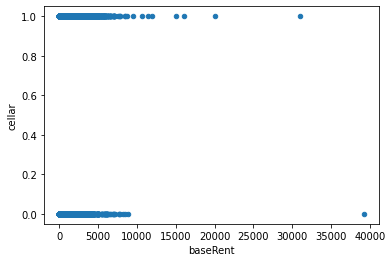

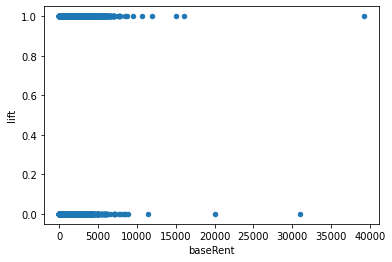

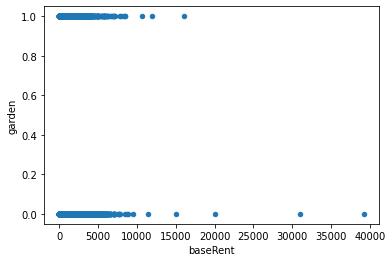

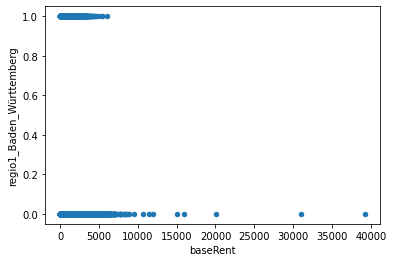

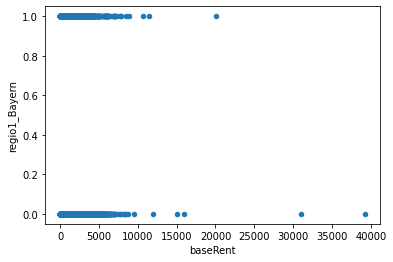

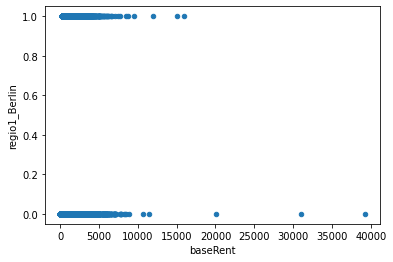

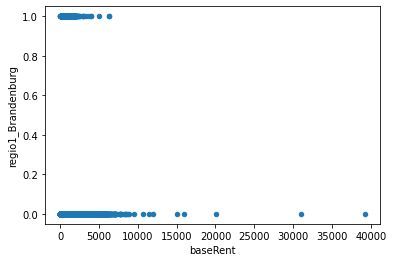

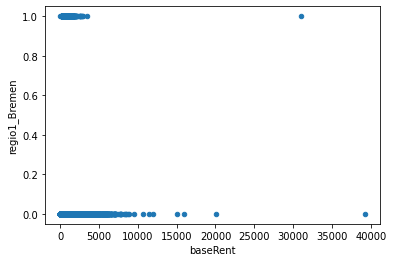

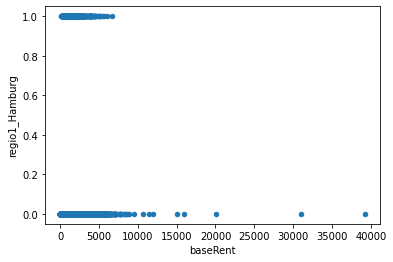

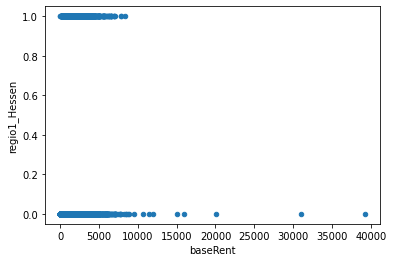

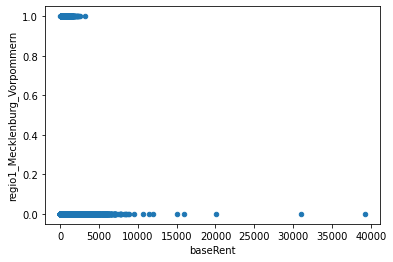

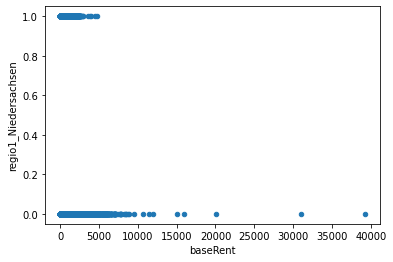

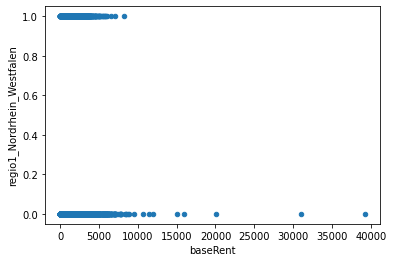

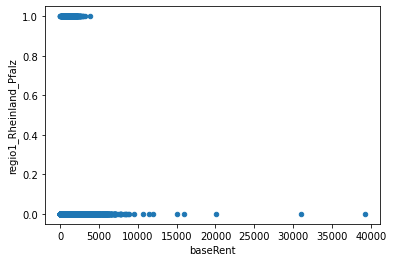

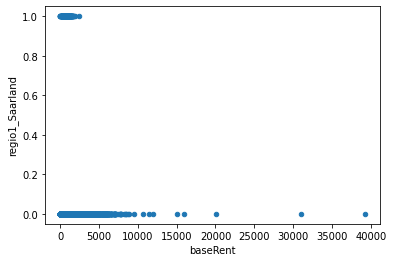

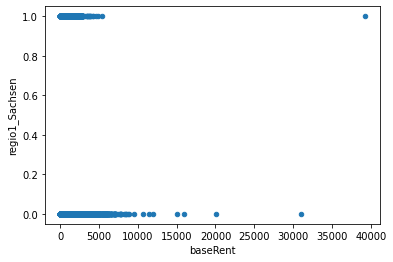

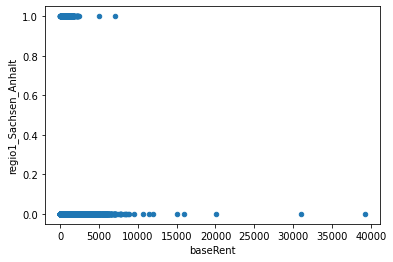

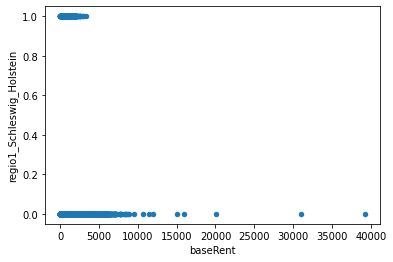

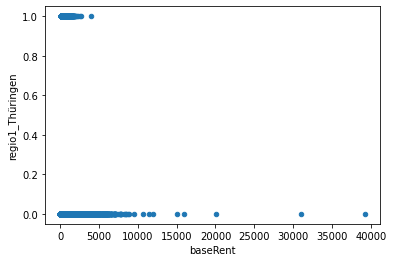

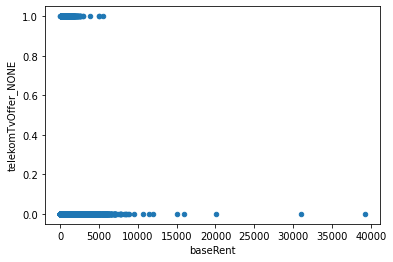

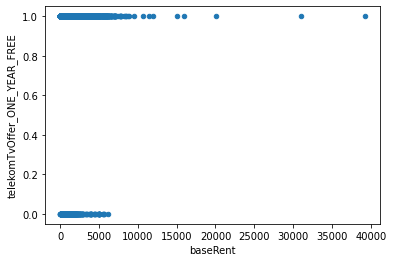

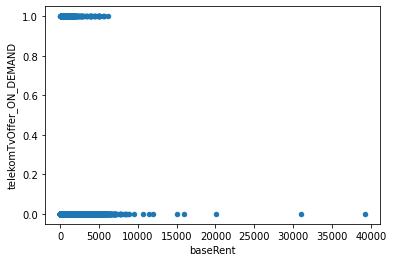

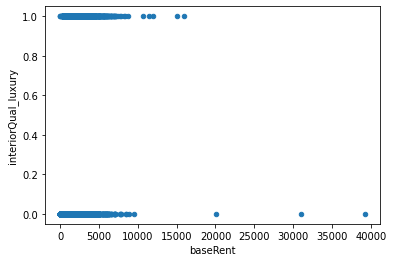

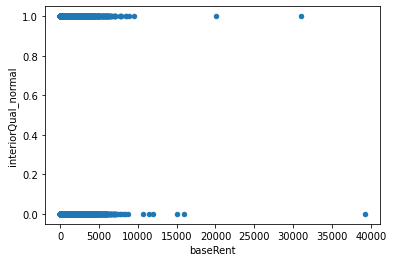

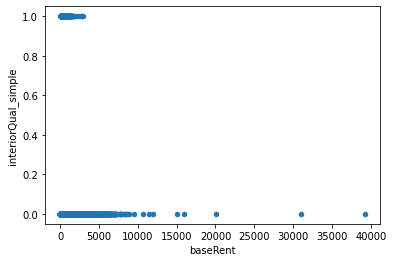

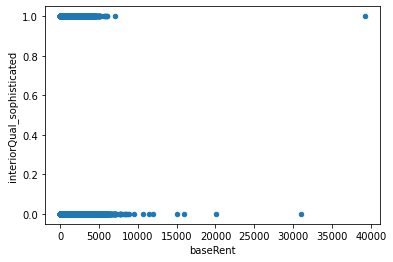

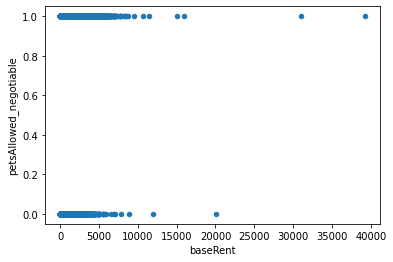

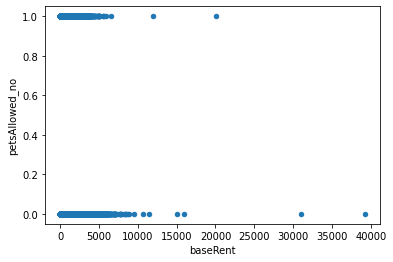

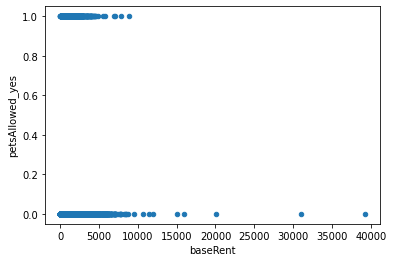

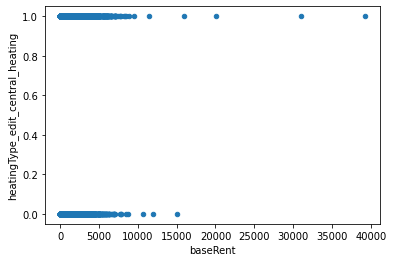

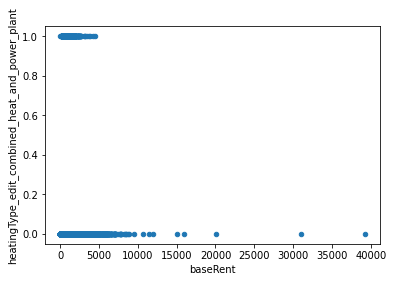

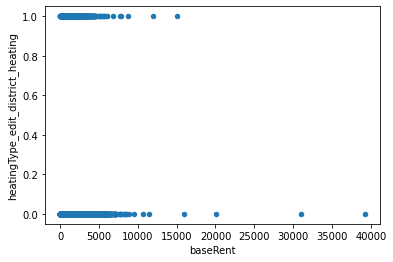

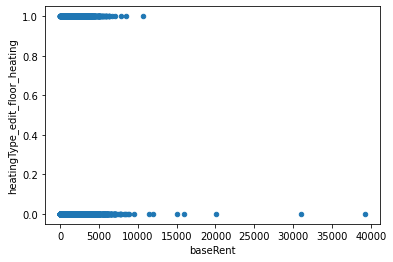

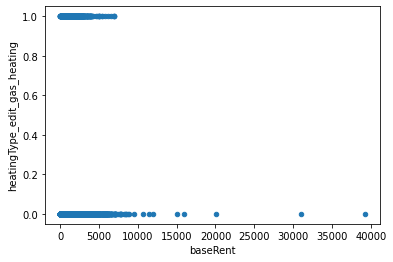

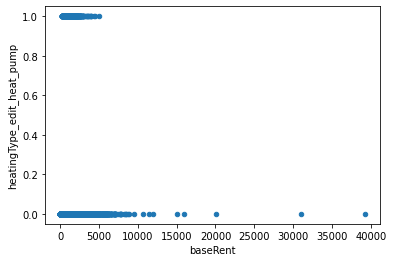

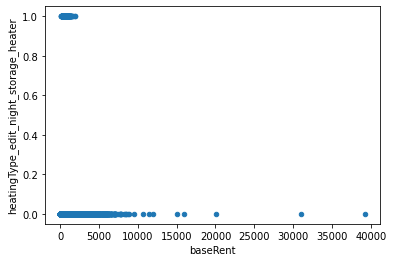

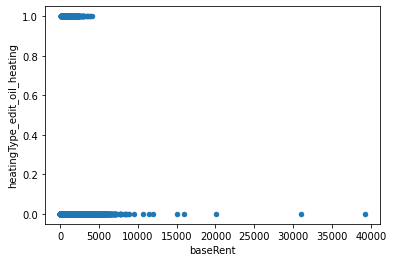

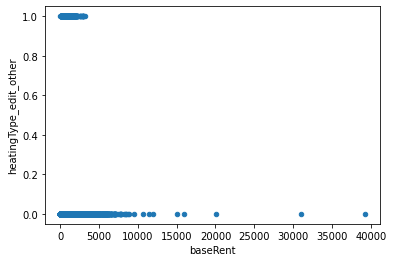

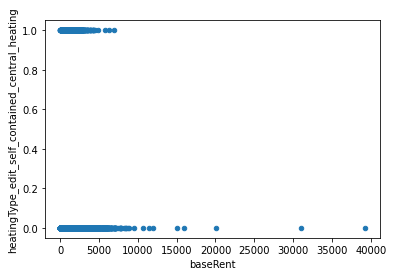

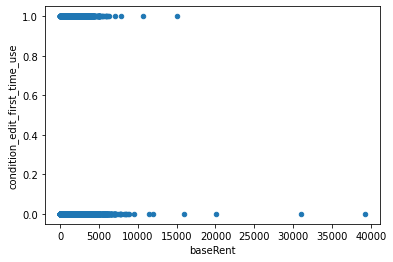

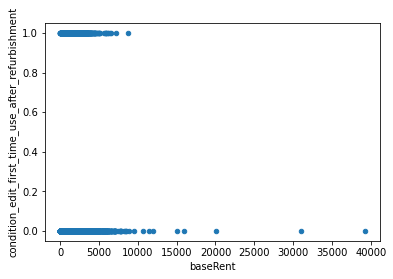

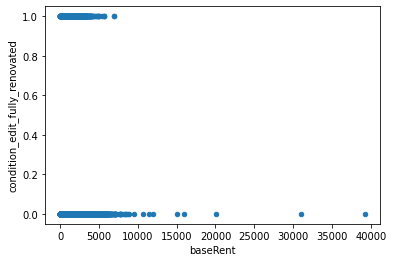

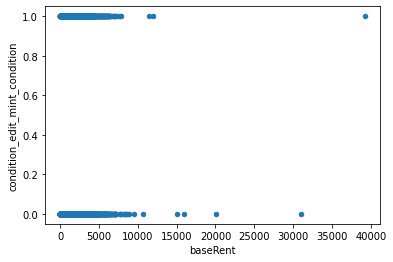

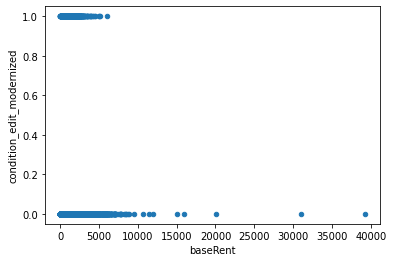

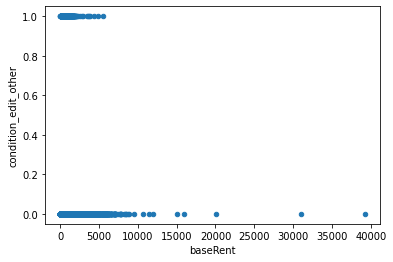

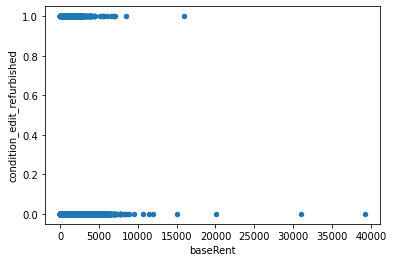

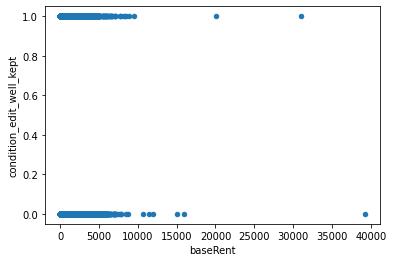

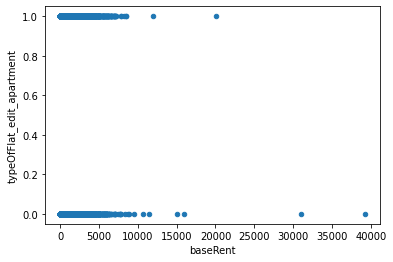

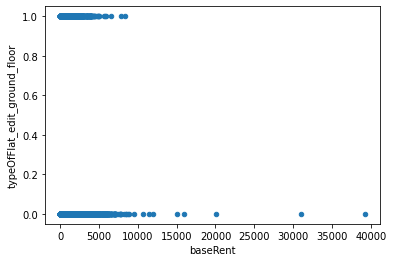

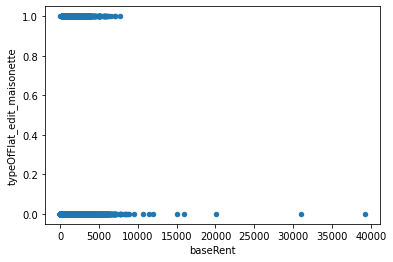

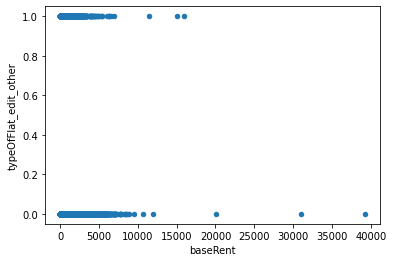

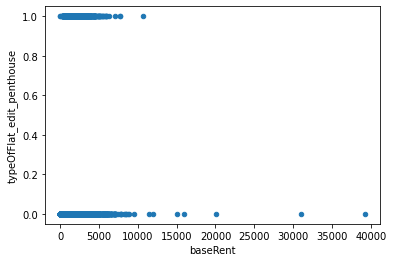

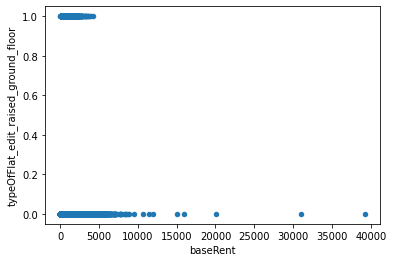

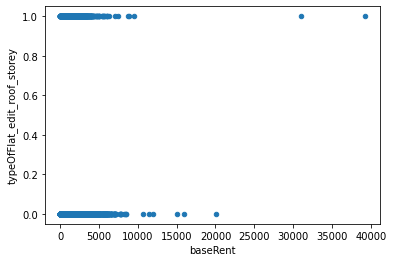

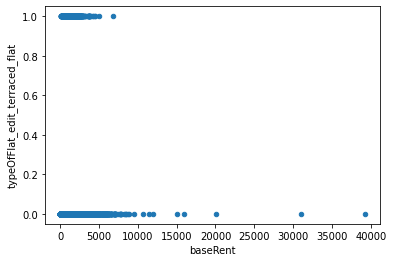

In [71]:
for i in finally_data: # رسم نمودار قیمت با و ارتباط ان با هر ویژگی
  finally_data.plot.scatter("baseRent",i)

In [72]:
y=finally_data["baseRent"].values  # مشخص کردن ورودی و خروجی
finally_data.drop("baseRent", inplace=True,axis=1)
x=finally_data.values

In [73]:
from sklearn.model_selection import train_test_split# جدا کردن دیتا به دو قسمت ترین و تست که بخش تست 80 درصد دیتاست اصلی است
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.linear_model import LinearRegression# اجرای رگرسیون خطی و مشخص کردن ضریب یادگیری روی دیتای اصلی 
model=LinearRegression().fit(x_train,y_train)
print(model.score(x_train,y_train))

0.8237104992678501


In [75]:
y_hat=model.predict(x_test)# پیشبینی مدل از دیتای تست ورودی
y_hat[0:5]

array([1027.07689586,  250.9603043 ,  546.33731589,   91.70551002,
        239.41908046])

In [76]:
from sklearn.metrics import r2_score# پیشبینی قیمت r2_score مشخص کردن 
print(r2_score(y_test,y_hat))

0.8238012124025691


In [77]:
new_data["z"]=0 # اضافه کردن ستون جدید به دیتاست برای گروه بندی

In [78]:
gbos = new_data.groupby('z') # Z گروهبندی بر اساس 
for label , group in gbos:
    print(f'label : {label}')
    print(f'groupby : \n {group}')

label : 0
groupby : 
                      regio1  serviceCharge                     heatingType  \
0       Nordrhein_Westfalen         245.00                 central_heating   
1           Rheinland_Pfalz         134.00  self_contained_central_heating   
2                   Sachsen         255.00                   floor_heating   
3                   Sachsen          58.15                district_heating   
4                    Bremen         138.00  self_contained_central_heating   
...                     ...            ...                             ...   
268845               Bayern          90.00                       heat_pump   
268846               Hessen         220.00                     gas_heating   
268847               Hessen         220.00                 central_heating   
268848  Nordrhein_Westfalen         175.00                       heat_pump   
268849               Hessen         315.00                 central_heating   

       telekomTvOffer  telekomHybridUploa

In [79]:
def my_func(group):# نوشتن تابع برای پیش پردازش
  non_data=group.columns[(group.isna().sum()/len(group))>0.5]
  group=group.drop(non_data,axis=1)

  group.fillna(group._get_numeric_data().mean(),inplace=True)

  for col in group.columns:
    if group[col].dtype=="object" or group[col].dtype=="bool" :
      group[col]=group[col].fillna(group[col].value_counts().head(1).index[0])



  return group


In [80]:
from multiprocessing import Pool,cpu_count # multiprocessing اپلای فانکشن روی دیتاست با 
import time
start=time.time()
with Pool(cpu_count()) as p:
  new=list(p.map(my_func,[group for _, group in gbos]))
end=time.time()
print(end-start)

6.934942960739136


In [81]:
print(new[0].shape)
new[0].isna().sum()

(268850, 43)


regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
houseNumber             0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
street                  0
streetPlain             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3      

In [82]:
import dask # use dask
import dask.dataframe as dd
ddf = dd.from_pandas(new_data, npartitions=2) # dask  به دیتافریم  pandas  تبدیل دیتافریم 

ImportError: ignored

In [ ]:
start_time=time.time() # و محاسبه ران تایم dask  نوشتن همان تابع قبلی با دستورات  
non_data=ddf.columns[(ddf.isna().sum()/len(ddf))>0.5]
ddf=ddf.drop(non_data,axis=1)

ddf=ddf.fillna(ddf._get_numeric_data().mean())

for col in ddf.columns:
  if ddf[col].dtype=="object" or ddf[col].dtype=="bool" :
    ddf[col]=ddf[col].fillna(ddf[col].value_counts().head(1).index[0])


end_time=time.time()
print(end_time-start_time)

In [ ]:
#به دیتافریم پانداس  dask  تبدلی دیتا فریم  
dpdf = ddf.compute()
print(dpdf.shape)
dpdf.isna().sum()